![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# New York City Airbnb Open Data

analyze Airbnb listings data.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the `airbnb_data` dataset into a `airbnb_df` DataFrame variable.

This data file includes all needed information to find out more about hosts and geographical availability.

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

Here's a preview of that file:

In [ ]:
!head data/airbnb_data.csv

listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,,,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.1,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767

The column names are taken from the original documentation for this dataset.

In [ ]:
# your code goes here
df = pd.read_csv("data/airbnb_data.csv")
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Setting `airbnb_data` index.

Set the index of the DataFrame to the `listing_id` column.

In [ ]:
# your code goes here
df.set_index("listing_id",inplace = True)
df

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,"Prospect-Lefferts Gardens, Brooklyn",40.65814;-73.96181,Entire home/apt,"$150,00.-",3,87,16/6/19,1.00,1,73
439750,Perfect apt. above L train Graham stop,1566042,Haley,"Williamsburg, Brooklyn",40.71517;-73.94292,Private room,"$55,00.-",150,10,19/5/18,0.14,1,97
439870,"Gorgeous Park Slope, BK triplex 4BD",1903758,Andrij,"Park Slope, Brooklyn",40.66859;-73.98235,Entire home/apt,"$299,00.-",20,0,NaN,NaN,1,149


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking missing data

We need to check if our `airbnb_data` has any null value.

To do that, let's create a `percent_missing` Series containing the column names and the percent of missing values per column.

In [ ]:
# your code goes here
percent_missing = df.isna().sum()/df.shape[0]*100
percent_missing

,0
listing_name,0.000000
host_id,0.000000
host_name,0.094340
neighbourhood_group,0.000000
lat_lon,0.000000
room_type,0.000000
price,0.000000
minimum_nights,0.000000
number_of_reviews,0.000000
last_review,4.056604


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `reviews_per_month` missing values

Impute null values in the `reviews_per_month` column with a `0` value.

In [ ]:
# your code goes here
df.loc[df["reviews_per_month"]==0,"reviews_per_month"]=np.nan
df['reviews_per_month']

,reviews_per_month
listing_id,
2539,0.21
2595,0.38
3647,NaN
3831,4.64
5022,0.10
...,...
438513,1.00
439750,0.14
439870,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_name` missing values

Drop the rows where `host_name` has a missing value.

In [ ]:
# your code goes here
df.dropna(axis = 0, subset=['host_name'],inplace= True)
df

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,"Prospect-Lefferts Gardens, Brooklyn",40.65814;-73.96181,Entire home/apt,"$150,00.-",3,87,16/6/19,1.00,1,73
439750,Perfect apt. above L train Graham stop,1566042,Haley,"Williamsburg, Brooklyn",40.71517;-73.94292,Private room,"$55,00.-",150,10,19/5/18,0.14,1,97
439870,"Gorgeous Park Slope, BK triplex 4BD",1903758,Andrij,"Park Slope, Brooklyn",40.66859;-73.98235,Entire home/apt,"$299,00.-",20,0,NaN,NaN,1,149


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `last_review` missing values

Drop the rows where `last_review` has a missing value.

In [ ]:
# your code goes here
df.dropna(axis = 0, subset=['last_review'],inplace= True)
df

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767;-73.975,Entire home/apt,"$200,00.-",3,74,22/6/19,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437906,GREAT 1BR/2BA TERRACE & W/D! in EV!,0,Ralph,"East Village, Manhattan",40.728;-73.97903,Entire home/apt,"$350,00.-",5,4,7/10/15,0.07,1,0
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,"Prospect-Lefferts Gardens, Brooklyn",40.65814;-73.96181,Entire home/apt,"$150,00.-",3,87,16/6/19,1.00,1,73
439750,Perfect apt. above L train Graham stop,1566042,Haley,"Williamsburg, Brooklyn",40.71517;-73.94292,Private room,"$55,00.-",150,10,19/5/18,0.14,1,97


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_id` invalid values

Drop the rows where `host_id` has a `0` value.

In [ ]:
# your code goes here
df.drop(df[df["host_id"]==0].index,inplace = True)
df

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767;-73.975,Entire home/apt,"$200,00.-",3,74,22/6/19,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437352,Fantastic 2BR in Brooklyn's Best Area,290662,Seth,"Park Slope, Brooklyn",40.67078;-73.98815,Entire home/apt,"$105,00.-",115,15,31/12/18,0.17,1,219
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,"Prospect-Lefferts Gardens, Brooklyn",40.65814;-73.96181,Entire home/apt,"$150,00.-",3,87,16/6/19,1.00,1,73
439750,Perfect apt. above L train Graham stop,1566042,Haley,"Williamsburg, Brooklyn",40.71517;-73.94292,Private room,"$55,00.-",150,10,19/5/18,0.14,1,97


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Now cast this `last_review` column to `datetime`

In [ ]:
# your code goes here
df['last_review'] = pd.to_datetime(df['last_review'])

<ipython-input-10-78d28c62e098>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_review'] = pd.to_datetime(df['last_review'])


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Duplicated listings

Many listings could be duplicated. Drop all the entries that have the same `listing_name`, `price` and `room_type`. Keep just the last entry.

In [ ]:
# your code goes here
df.drop_duplicates(subset=['listing_name','price','room_type'],inplace = True)
df

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,2019-05-21,0.38,2,355
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,2019-05-07,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767;-73.975,Entire home/apt,"$200,00.-",3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437352,Fantastic 2BR in Brooklyn's Best Area,290662,Seth,"Park Slope, Brooklyn",40.67078;-73.98815,Entire home/apt,"$105,00.-",115,15,2018-12-31,0.17,1,219
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,"Prospect-Lefferts Gardens, Brooklyn",40.65814;-73.96181,Entire home/apt,"$150,00.-",3,87,2019-06-16,1.00,1,73
439750,Perfect apt. above L train Graham stop,1566042,Haley,"Williamsburg, Brooklyn",40.71517;-73.94292,Private room,"$55,00.-",150,10,2018-05-19,0.14,1,97


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Invalid `price`

Check the `price`. It should be a numeric type column.

- Remove the `$`, `.` and `-` characters.
- Replace `,` with a `.` character.
- Cast the column to `float` dtype.

In [ ]:
# your code goes here

df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace('.','')
df['price'] = df['price'].str.replace('-','')
df['price'] = df['price'].str.replace(',','.')
df['price'] = df['price'].astype(float)
df['price']



,price
listing_id,
2539,149.0
2595,225.0
3831,89.0
5022,80.0
5099,200.0
...,...
437352,105.0
438513,150.0
439750,55.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `neighbourhood_group` column

Check the `neighbourhood_group` column. It should be divided into two different columns: `neighbourhood` and `borough`.

After the split, drop the `neighbourhood_group` column.

In [ ]:
# your code goes here
df[['neighbourhood','borough']] = df.iloc[:,3].str.split(', ', expand = True)
df.drop(['neighbourhood_group'],axis = 1,inplace = True)

ValueError: Columns must be same length as key

In [ ]:
df

,listing_name,host_id,host_name,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough
listing_id,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,40.64749;-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365,Kensington,Brooklyn
2595,Skylit Midtown Castle,2845,Jennifer,40.75362;-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,Midtown,Manhattan
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514;-73.95976,Entire home/apt,89.0,1,270,2019-05-07,4.64,1,194,Clinton Hill,Brooklyn
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851;-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,East Harlem,Manhattan
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,40.74767;-73.975,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129,Murray Hill,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437352,Fantastic 2BR in Brooklyn's Best Area,290662,Seth,40.67078;-73.98815,Entire home/apt,105.0,115,15,2018-12-31,0.17,1,219,Park Slope,Brooklyn
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,40.65814;-73.96181,Entire home/apt,150.0,3,87,2019-06-16,1.00,1,73,Prospect-Lefferts Gardens,Brooklyn
439750,Perfect apt. above L train Graham stop,1566042,Haley,40.71517;-73.94292,Private room,55.0,150,10,2018-05-19,0.14,1,97,Williamsburg,Brooklyn


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `lat_lon` column

Create two new columns `latitude` and `longitude` containing the product of splitting the `lat_lon` column. Both new columns should be casted to `float` dtype.

After the split, drop the `lat_lon` column.

In [ ]:
# your code goes here

df[['latitude', 'longitude']] = df['lat_lon'].str.split(';', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df.drop(columns = ['lat_lon'],inplace = True)
df

,listing_name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough,latitude,longitude
listing_id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Private room,149.0,1,9,2018-10-19,0.21,6,365,Kensington,Brooklyn,40.64749,-73.97237
2595,Skylit Midtown Castle,2845,Jennifer,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,Midtown,Manhattan,40.75362,-73.98377
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Entire home/apt,89.0,1,270,2019-05-07,4.64,1,194,Clinton Hill,Brooklyn,40.68514,-73.95976
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,East Harlem,Manhattan,40.79851,-73.94399
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129,Murray Hill,Manhattan,40.74767,-73.97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437352,Fantastic 2BR in Brooklyn's Best Area,290662,Seth,Entire home/apt,105.0,115,15,2018-12-31,0.17,1,219,Park Slope,Brooklyn,40.67078,-73.98815
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,Entire home/apt,150.0,3,87,2019-06-16,1.00,1,73,Prospect-Lefferts Gardens,Brooklyn,40.65814,-73.96181
439750,Perfect apt. above L train Graham stop,1566042,Haley,Private room,55.0,150,10,2018-05-19,0.14,1,97,Williamsburg,Brooklyn,40.71517,-73.94292


#### Visualizing points on a map

Let's visualize your `airbnb_df` to confirm everything is in correct format so far.

Execute the below code to visualize the `latitude` and `longitude` you just created.

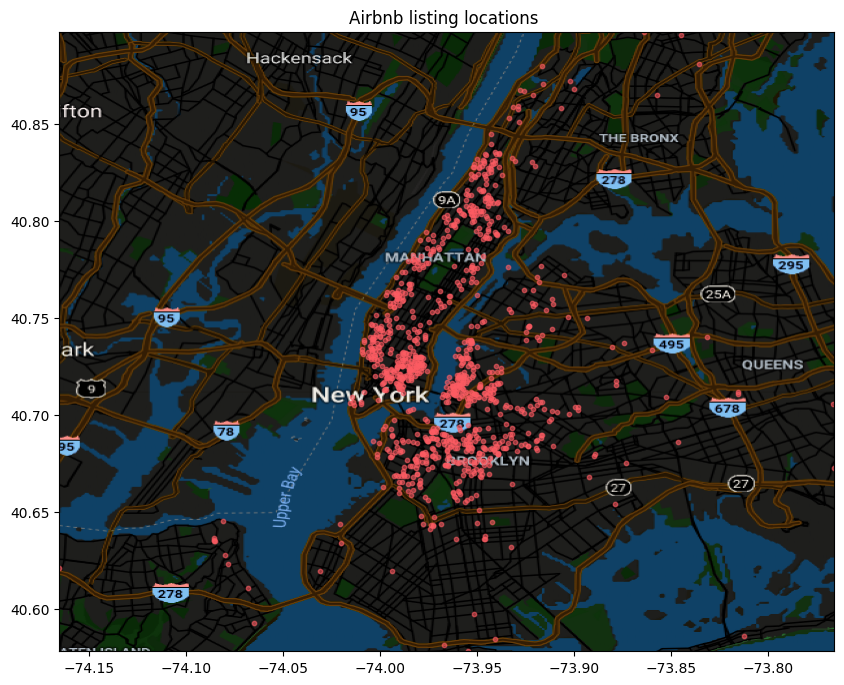

In [ ]:
longlat_min_max = (df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max())

nyc = plt.imread('./data/nyc-map.png')

fig, ax = plt.subplots(figsize=(10,9))

ax.scatter(df.longitude, df.latitude, zorder=1, alpha=0.6, c='#fd5c63', s=10)
ax.set_title('Airbnb listing locations ')
ax.imshow(nyc, extent=longlat_min_max);

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing `availability_365` values

This columns should casted to numeric dtype, but it has many invalid string values, like `43+N524`, that should be coerced while casting.

Also we can see many values out of domain, let's fix them:
- Negative numbers, that should be converted to positive.
- Numbers above 365, that should be dropped.

In [ ]:
df['availability_365'].unique()

array(['365', '355', '194', '0', '129', '220', '188', '6', '39', '314',
       '46', '321', '12', '21', '304', '347', '364', '233', '85', '75',
       '311', '67', '255', '284', '359', '269', '340', '22', '96', '345',
       '273', '3454', '95', '215', '265', '192', '251', '302', '140',
       '234', '257', '30', '301', '294', '320', '154', '5234', '180',
       '231', '297', '292', '191', '72', '362', '336', '116', '88', '224',
       '322', '324', '132', '295', '238', '209', '328', '7', '272', '26',
       '288', '317', '207', '185', '158', '9', '198', '219', '342', '312',
       '243', '152', '137', '222', '346', '208', '279', '250', '164',
       '298', '260', '107', '199', '299', '20', '318', '216', '245',
       '189', '307', '310', '213', '278', '16', '178', '275', '163', '34',
       '280', '1', '170', '214', '248', '262', '339', '10', '290', '230',
       '53', '126', '3', '37', '353', '177', '1111', '246', '225', '18',
       '343', '326', '162', '240', '363', '247', '323', '

In [ ]:
# your code goes here
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')
df['availability_365'] = df['availability_365'].abs()
df = df[df['availability_365']<=365]
df


,listing_name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough,latitude,longitude
listing_id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Private room,149.0,1,9,2018-10-19,0.21,6,365.0,Kensington,Brooklyn,40.64749,-73.97237
2595,Skylit Midtown Castle,2845,Jennifer,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355.0,Midtown,Manhattan,40.75362,-73.98377
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Entire home/apt,89.0,1,270,2019-05-07,4.64,1,194.0,Clinton Hill,Brooklyn,40.68514,-73.95976
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0.0,East Harlem,Manhattan,40.79851,-73.94399
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129.0,Murray Hill,Manhattan,40.74767,-73.97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437352,Fantastic 2BR in Brooklyn's Best Area,290662,Seth,Entire home/apt,105.0,115,15,2018-12-31,0.17,1,219.0,Park Slope,Brooklyn,40.67078,-73.98815
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,Entire home/apt,150.0,3,87,2019-06-16,1.00,1,73.0,Prospect-Lefferts Gardens,Brooklyn,40.65814,-73.96181
439750,Perfect apt. above L train Graham stop,1566042,Haley,Private room,55.0,150,10,2018-05-19,0.14,1,97.0,Williamsburg,Brooklyn,40.71517,-73.94292


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most reviews

Create a Series `most_reviews` containing the top 10 `host_name`s with the most total (sum) reviews per month accross all properties owned by that host.

In [ ]:
# your code goes here

most_reviews = (df.groupby('host_name')['reviews_per_month'].sum().sort_values(ascending = False)).head(10)
most_reviews

,reviews_per_month
host_name,
Jason,17.43
Mark,9.12
Daniel,8.77
Carol,8.50
Lissette,8.19
Marylyn,8.17
Ben,7.54
Dennis,7.46
Waldemar,7.36


#### Visualizing most_reviews

Text(0, 0.5, '')

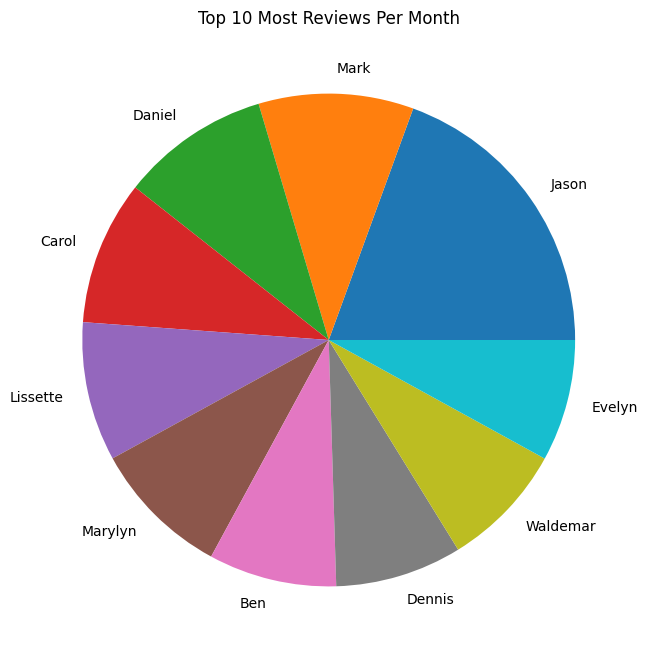

In [ ]:
most_reviews.plot(kind='pie',figsize=(8, 8))

plt.title("Top 10 Most Reviews Per Month")
plt.ylabel("")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most expensive listings

Create a variable `expensive_listings_df` containing the top 100 most expensive per night listings. The most expensive should be at the top.

In [ ]:
# your code goes here

expensive_listings_df =  df.sort_values(by='price', ascending=False).head(100)
expensive_listings_df

,listing_name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough,latitude,longitude
listing_id,,,,,,,,,,,,,,,
174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Entire home/apt,2000.0,30,30,2018-05-05,0.33,11,0.0,Upper West Side,Manhattan,40.77350,-73.98697
273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Entire home/apt,1300.0,5,28,2018-09-25,0.31,4,297.0,West Village,Manhattan,40.73301,-74.00268
250801,Heart & Soul of Greenwich Village,1314834,Rhona,Entire home/apt,850.0,3,107,2019-05-23,1.15,1,249.0,Greenwich Village,Manhattan,40.73129,-73.99944
19601,perfect for a family or small group,74303,Maggie,Entire home/apt,800.0,1,25,2016-04-08,0.24,1,7.0,Brooklyn Heights,Brooklyn,40.69723,-73.99268
279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Entire home/apt,800.0,4,122,2019-02-07,1.37,1,257.0,Bedford-Stuyvesant,Brooklyn,40.68492,-73.95489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351859,Exquisite Spacious Studio in Midtown,417652,Ron,Entire home/apt,265.0,4,75,2019-01-07,0.86,1,324.0,Chelsea,Manhattan,40.74964,-73.99158
53477,3 floors of luxury!,204539,Mark,Entire home/apt,265.0,7,38,2019-04-27,0.38,5,365.0,Middle Village,Queens,40.71546,-73.87854
127387,"Luxe, Spacious 2BR 2BA Nr Trains",23276,Katharine,Entire home/apt,260.0,30,3,2014-04-08,0.03,1,316.0,Gowanus,Brooklyn,40.66862,-73.99260


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has biggest amount of expensive listings?

Using the `expensive_listings_df` listings count the occurrences of each `neighbourhood` they belong.

In [ ]:
# your code goes here

expensive_listings_df['neighbourhood'].value_counts()

,count
neighbourhood,
Williamsburg,10
Chelsea,8
West Village,7
Harlem,7
Greenpoint,7
East Village,7
Upper West Side,5
Nolita,5
Carroll Gardens,4


#### Visualizing neighbourhoods

<Axes: xlabel='neighbourhood'>

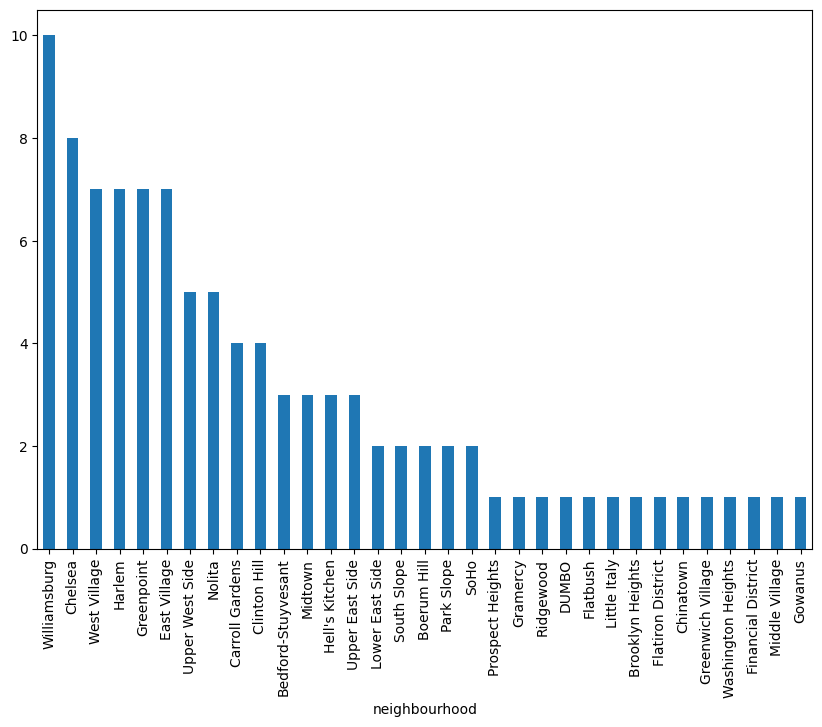

In [ ]:
expensive_listings_df['neighbourhood'].value_counts().plot(kind='bar', figsize=(10,7))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has the most listings?

Using all the listings from `airbnb_df` count how many listings each neighbourhood has. Keep just the top 10 neighbourhoods with the most listings.

In [ ]:
# your code goes here
df['neighbourhood'].value_counts().head(10)


,count
neighbourhood,
Williamsburg,110
Harlem,74
Bedford-Stuyvesant,72
East Village,65
Upper West Side,44
Greenpoint,42
West Village,33
Crown Heights,32
Hell's Kitchen,30


#### Visualizing neighbourhoods

<Axes: xlabel='neighbourhood'>

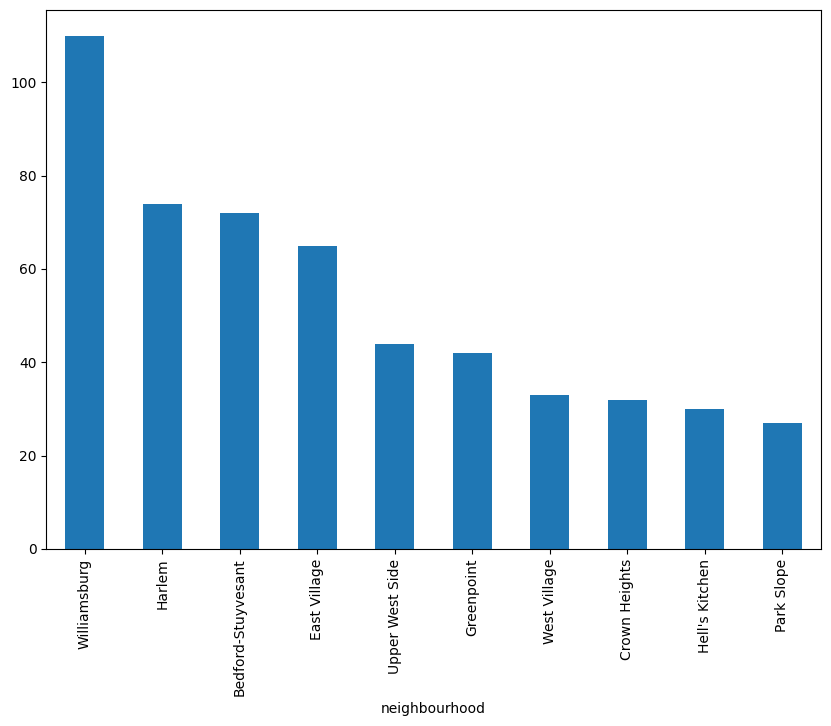

In [ ]:
df['neighbourhood'].value_counts().head(10).plot(kind='bar', figsize=(10,7))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)